In [17]:
## scikit learn linear regression tutorial

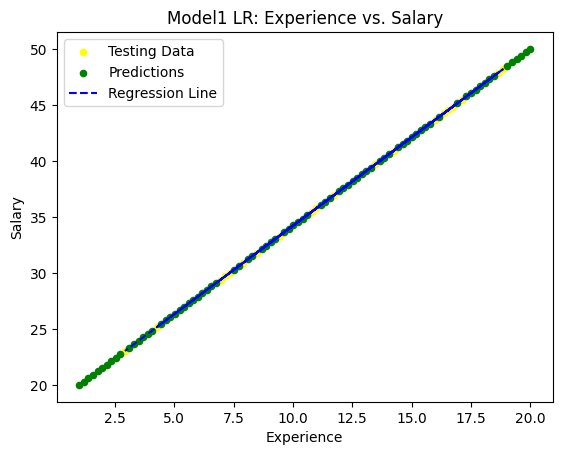

Model 1 plain lr rsquare: 1.000
Model 2 cv_scores :[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Fitting 6 folds for each of 8 candidates, totalling 48 fits
Model3 grid search best barams: {'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'positive': True}
Model3 grid search rsquare: 1.0


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression

x = np.linspace(1,20, num=100).reshape(-1,1)
y = np.linspace(20,50, num=100)
# no need to scale feautures for LR

model1=LinearRegression(n_jobs=-1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

## test 1
model1.fit(x_train, y_train)
y_pred=model1.predict(x_test)

plt.scatter(x_test, y_test, color="yellow", label="Testing Data", s=20)
plt.scatter(x_train, y_train, color="green", label="Predictions", s=20)
plt.plot(x_test, y_pred, color="blue", linestyle="--", label="Regression Line")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.title("Model1 LR: Experience vs. Salary")
plt.legend()
plt.show()
print(f"Model 1 plain lr rsquare: {model1.score(x_test, y_test):.3f}")

## test 2
model2=LinearRegression(n_jobs=-1)
cv_scores = cross_val_score(estimator=model2, X=x_train, y=y_train, cv=6, scoring="r2", verbose=1)
print(f"Model 2 cv_scores :{[round(i,3) for i in cv_scores]}")

## test 3
model3=LinearRegression()
model_params = {"fit_intercept":[True, False],
                "copy_X":[True, False],
                "positive":[True, False],
                "n_jobs":[-1]}
## not really needed as params of the LR does not affect the score except fit intercept, which when turned off will give a score of 0, and might introduce bias
grid=GridSearchCV(estimator=model3, param_grid=model_params, cv=6, scoring="r2", verbose=1)
grid.fit(x_train, y_train)
print(f"Model3 grid search best barams: {grid.best_params_}")
print(f"Model3 grid search rsquare: {grid.best_score_}")
# grid.cv_results_

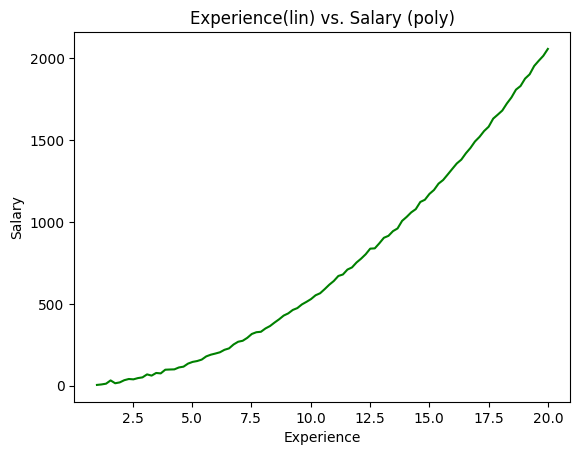

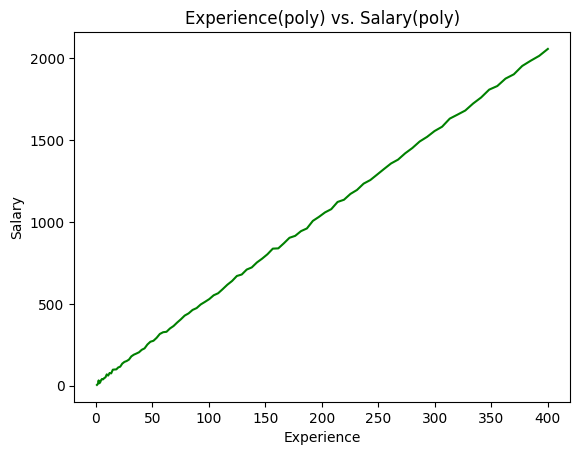

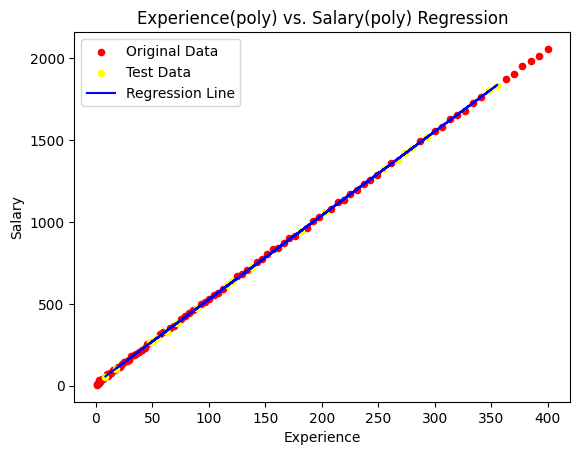

Model 1 plain lr rsquare: 1.000


In [2]:
x=np.linspace(1,20, num=100).reshape(-1,1)
y=5 * x**2 + 3 * x + 2 + np.random.normal(scale=5, size=x.size).reshape(-1,1)

plt.plot(x, y, "g-")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.title("Experience(lin) vs. Salary (poly)")
plt.show()

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)

x_poly_polynomial = pd.DataFrame(x_poly, columns=["x0", "x1", "x2"])
# dropping x0, x1 is not recommended as per the instructions of the chatgpt because they are bias and the original feature, dropping these here for visualization.
x_poly_polynomial = x_poly_polynomial.drop(["x0", "x1"], axis=1)

plt.plot(x_poly_polynomial, y, "g-")
plt.xlabel("Experience")    
plt.ylabel("Salary")
plt.title("Experience(poly) vs. Salary(poly)")
plt.show()

model1=LinearRegression(n_jobs=-1)
x_train, x_test, y_train, y_test = train_test_split(x_poly_polynomial, y, test_size=0.2, random_state=1)
model1.fit(x_train, y_train)
y_pred=model1.predict(x_test)

plt.scatter(x_train, y_train, color="red", label="Original Data", s=20)
plt.scatter(x_test, y_test, color="yellow", label="Test Data", s=20)
plt.plot(x_test, y_pred, "b-", label="Regression Line")
plt.xlabel("Experience")    
plt.ylabel("Salary")
plt.title("Experience(poly) vs. Salary(poly) Regression")
plt.legend()
plt.show()

print(f"Model 1 plain lr rsquare: {model1.score(x_test, y_test):.3f}")
## output
# Model 1 plain lr rsquare: 1.000

In [3]:
from sklearn.datasets import fetch_california_housing
california=fetch_california_housing()
x=pd.DataFrame(data=california.data, columns=california.feature_names)
y=pd.Series(california.target)
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
x.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [5]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [6]:
x.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

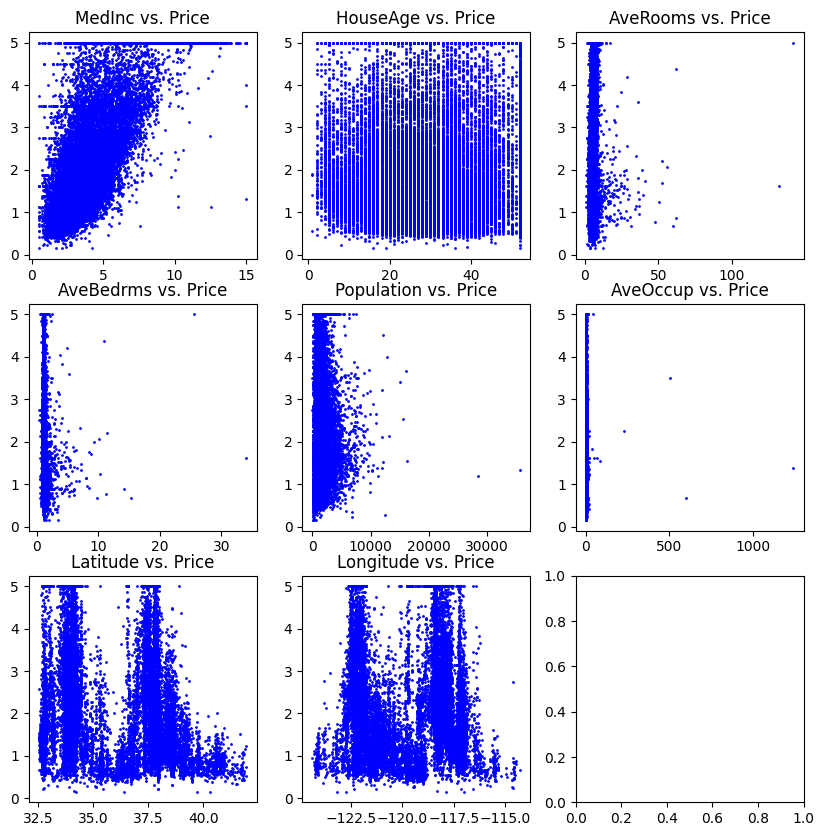

In [7]:
# plotting the data, to see the relationship between the features and the target
_, axes=plt.subplots(nrows= 3, ncols= 3, figsize=(10,10))
for i, col in enumerate(x.columns):
    axes[i//3, i%3].scatter(x[col], y, s=1, color="blue")
    axes[i//3, i%3].set_title(f"{col} vs. Price")
plt.show()

In [8]:
# there is a linear relationship between MedInc and the target, the rest of the features have a non-linear relationship with the target.
# AveBedrms, AveRooms and AveOccup are kind of constant
# Population and Latitude are kind of scattered, but there is similarity between the two

Model rsquare: 0.597


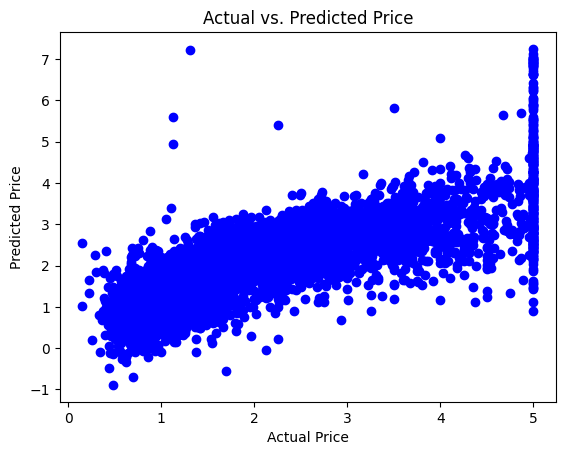

Optimal number of features: 4
Selected features: Index(['MedInc', 'AveBedrms', 'Latitude', 'Longitude'], dtype='object')
Model rsquare: 0.581


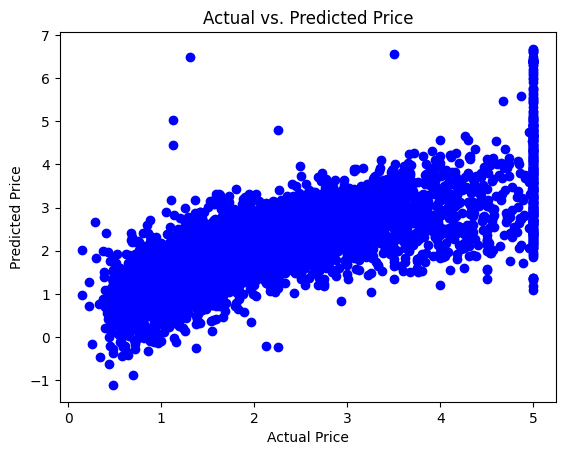

In [9]:
from sklearn.feature_selection import RFE

model=LinearRegression(n_jobs=-1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
model.fit(x_train, y_train)
y_pred=model.predict(x_test)
print(f"Model rsquare: {model.score(x_test, y_test):.3f}")
plt.scatter(y_test, y_pred, color="blue")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Price")
plt.show()

model=LinearRegression(n_jobs=-1)
feature_selector=RFE(estimator=model)
feature_selector.fit(x_train,y_train)
print(f"Optimal number of features: {feature_selector.n_features_}")
print(f"Selected features: {x.columns[feature_selector.support_]}")


x_train_selected=feature_selector.transform(x_train)
x_test_selected=feature_selector.transform(x_test)
model=LinearRegression(n_jobs=-1)
model.fit(x_train_selected, y_train)
y_pred=model.predict(x_test_selected)
print(f"Model rsquare: {model.score(x_test_selected, y_test):.3f}")
plt.scatter(y_test, y_pred, color="blue")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Price")
plt.show()

In [10]:
# feature selection is costing us rsquare, so we will not use it in this case.

In [11]:
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x_train[["Latitude", "Longitude"]])
x_poly = pd.DataFrame(x_poly, columns=["x0", "x1", "x2", "x3", "x4", "x5"], index=x_train.index)

x_train_poly=pd.concat([x_train, x_poly], axis=1)
x_train_poly=x_train_poly.drop(["Latitude", "Longitude"], axis=1)

x_poly = poly.transform(x_test[["Latitude", "Longitude"]])
x_poly = pd.DataFrame(x_poly, columns=["x0", "x1", "x2", "x3", "x4", "x5"], index=x_test.index) 
x_test_poly=pd.concat([x_test, x_poly], axis=1)
x_test_poly=x_test_poly.drop(["Latitude", "Longitude"], axis=1)

model=LinearRegression(n_jobs=-1)
model.fit(x_train_poly, y_train)
y_pred=model.predict(x_test_poly)
print(f"Model rsquare: {model.score(x_test_poly, y_test):.3f}")

Model rsquare: 0.610


In [12]:
poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(x_train[["Latitude", "Longitude"]])
x_poly = pd.DataFrame(x_poly, columns=["x"+str(i) for i in range(1,11)], index=x_train.index)

x_train_poly=pd.concat([x_train, x_poly], axis=1)
x_train_poly=x_train_poly.drop(["Latitude", "Longitude"], axis=1)

x_poly = poly.transform(x_test[["Latitude", "Longitude"]])
x_poly = pd.DataFrame(x_poly, columns=["x"+str(i) for i in range(1,11)], index=x_test.index) 
x_test_poly=pd.concat([x_test, x_poly], axis=1)
x_test_poly=x_test_poly.drop(["Latitude", "Longitude"], axis=1)

model=LinearRegression(n_jobs=-1)
model.fit(x_train_poly, y_train)
y_pred=model.predict(x_test_poly)
print(f"Model rsquare: {model.score(x_test_poly, y_test):.3f}")

Model rsquare: 0.611


In [13]:
poly = PolynomialFeatures(degree=4)
x_poly = poly.fit_transform(x_train[["Latitude", "Longitude"]])
x_poly = pd.DataFrame(x_poly, columns=["x"+str(i) for i in range(1,16)], index=x_train.index)

x_train_poly=pd.concat([x_train, x_poly], axis=1)
x_train_poly=x_train_poly.drop(["Latitude", "Longitude"], axis=1)

x_poly = poly.transform(x_test[["Latitude", "Longitude"]])
x_poly = pd.DataFrame(x_poly, columns=["x"+str(i) for i in range(1,16)], index=x_test.index) 
x_test_poly=pd.concat([x_test, x_poly], axis=1)
x_test_poly=x_test_poly.drop(["Latitude", "Longitude"], axis=1)

model=LinearRegression(n_jobs=-1)
model.fit(x_train_poly, y_train)
y_pred=model.predict(x_test_poly)
print(f"Model rsquare: {model.score(x_test_poly, y_test):.3f}")

Model rsquare: 0.628


In [14]:
poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(x_train[["Latitude", "Longitude", "MedInc", "Population"]])
x_poly = pd.DataFrame(x_poly, columns=["x"+str(i) for i in range(1,36)], index=x_train.index)

x_train_poly=pd.concat([x_train, x_poly], axis=1)
x_train_poly=x_train_poly.drop(["Latitude", "Longitude", "MedInc", "Population"], axis=1)

x_poly = poly.transform(x_test[["Latitude", "Longitude", "MedInc", "Population"]])
x_poly = pd.DataFrame(x_poly, columns=["x"+str(i) for i in range(1,36)], index=x_test.index) 
x_test_poly=pd.concat([x_test, x_poly], axis=1)
x_test_poly=x_test_poly.drop(["Latitude", "Longitude", "MedInc", "Population"], axis=1)

model=LinearRegression(n_jobs=-1)
model.fit(x_train_poly, y_train)
print(f"Model training rsquare: {model.score(x_train_poly, y_train):.3f}")
y_pred=model.predict(x_test_poly)
print(f"Model testing rsquare: {model.score(x_test_poly, y_test):.3f}")

Model training rsquare: 0.623
Model testing rsquare: 0.594


In [15]:
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x_train[["Latitude", "Longitude", "MedInc", "Population"]])
x_poly = pd.DataFrame(x_poly, columns=["x"+str(i) for i in range(1,16)], index=x_train.index)

x_train_poly=pd.concat([x_train, x_poly], axis=1)

x_poly = poly.transform(x_test[["Latitude", "Longitude", "MedInc", "Population"]])
x_poly = pd.DataFrame(x_poly, columns=["x"+str(i) for i in range(1,16)], index=x_test.index) 
x_test_poly=pd.concat([x_test, x_poly], axis=1)

model=LinearRegression(n_jobs=-1)
model.fit(x_train_poly, y_train)
print(f"Model training rsquare: {model.score(x_train_poly, y_train):.3f}")
y_pred=model.predict(x_test_poly)
print(f"Model testing rsquare: {model.score(x_test_poly, y_test):.3f}")

Model training rsquare: 0.630
Model testing rsquare: 0.622


In [16]:
# this is better result as training rsquare is similar to the testing rsquare, which means the model is not overfitting

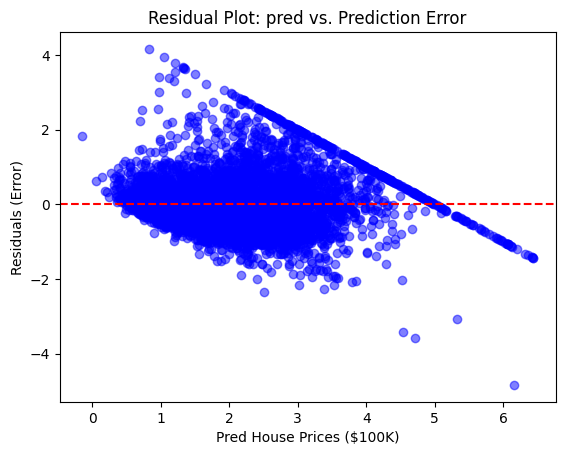

In [18]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals, color="blue", alpha=0.5)
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Pred House Prices ($100K)")
plt.ylabel("Residuals (Error)")
plt.title("Residual Plot: pred vs. Prediction Error")
plt.show()

In [19]:
feature_names = x_train_poly.columns

feature_importance = np.abs(model.coef_)

sorted_idx = np.argsort(feature_importance)[::-1]
top_features = np.array(feature_names)[sorted_idx[:10]]

print("🔹 Top 10 Most Important Features:")
for i, feature in enumerate(top_features):
    print(f"{i+1}. {feature}: {feature_importance[sorted_idx[i]]:.3f}")

🔹 Top 10 Most Important Features:
1. Latitude: 7.925
2. x2: 7.925
3. Longitude: 7.289
4. x3: 7.289
5. x4: 2.350
6. MedInc: 2.350
7. AveBedrms: 0.644
8. x7: 0.200
9. AveRooms: 0.116
10. x6: 0.108


In [20]:
model=LinearRegression(n_jobs=-1)
model.fit(x_train_poly[top_features.tolist()], y_train)
print(f"Model rsquare: {model.score(x_train_poly[top_features.tolist()], y_train):.3f}")
y_pred=model.predict(x_test_poly[top_features.tolist()])
print(f"Model rsquare: {model.score(x_test_poly[top_features.tolist()], y_test):.3f}")

Model rsquare: 0.604
Model rsquare: 0.594


In [21]:
# there is a drop in performance, this means other feautures were contributing fairly